In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

import seaborn as sns

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10

%matplotlib inline

In [2]:
df = pd.read_excel('C:/Users/Sum/Desktop/Sumin/16.프로젝트/한경_농협양곡/00.데이터/네이버_상품_인구통계_2021-01-01_2021-06-30.xlsx')
df.head()

,상품카테고리(대),상품카테고리(중),상품카테고리(소),상품카테고리(세),상품명,상품ID,성별,나이,결제금액,결제수,결제상품수량,환불금액,환불건수,환불수량
0,식품,농산물,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,여성,41~45,4154200,84,99,169800,4,4
1,식품,농산물,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,여성,36~40,2932200,67,70,123700,3,3
2,식품,농산물,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,여성,31~35,2684000,60,64,167700,4,4
3,식품,농산물,쌀,백미,[농협양곡] NH신동진쌀 20kg,4939329513,여성,46~50,2659800,37,42,63400,1,1
4,식품,농산물,쌀,백미,[농협양곡] NH신동진쌀 20kg,4939329513,여성,41~45,2587400,39,41,125800,2,2


In [3]:
df['순결제금액'] = df.결제금액 - df.환불금액
del df['상품카테고리(대)']
del df['상품카테고리(중)']

In [4]:
df.head()

,상품카테고리(소),상품카테고리(세),상품명,상품ID,성별,나이,결제금액,결제수,결제상품수량,환불금액,환불건수,환불수량,순결제금액
0,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,여성,41~45,4154200,84,99,169800,4,4,3984400
1,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,여성,36~40,2932200,67,70,123700,3,3,2808500
2,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,여성,31~35,2684000,60,64,167700,4,4,2516300
3,쌀,백미,[농협양곡] NH신동진쌀 20kg,4939329513,여성,46~50,2659800,37,42,63400,1,1,2596400
4,쌀,백미,[농협양곡] NH신동진쌀 20kg,4939329513,여성,41~45,2587400,39,41,125800,2,2,2461600


In [5]:
df['구분'] = df.성별 + df.나이

del df['성별']
del df['나이']

df.head()

,상품카테고리(소),상품카테고리(세),상품명,상품ID,결제금액,결제수,결제상품수량,환불금액,환불건수,환불수량,순결제금액,구분
0,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,4154200,84,99,169800,4,4,3984400,여성41~45
1,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,2932200,67,70,123700,3,3,2808500,여성36~40
2,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,2684000,60,64,167700,4,4,2516300,여성31~35
3,쌀,백미,[농협양곡] NH신동진쌀 20kg,4939329513,2659800,37,42,63400,1,1,2596400,여성46~50
4,쌀,백미,[농협양곡] NH신동진쌀 20kg,4939329513,2587400,39,41,125800,2,2,2461600,여성41~45


In [6]:
df.sort_values(by='순결제금액').head()

,상품카테고리(소),상품카테고리(세),상품명,상품ID,결제금액,결제수,결제상품수량,환불금액,환불건수,환불수량,순결제금액,구분
673,쌀,백미,[농협양곡] 칠산바다 간척지쌀 (새청무) 20kg,4965988684,60200,1,1,60200,1,1,0,여성56~60
657,쌀,백미,[농협양곡] 보은황토쌀 (삼광) 20kg,5441313406,61500,1,1,61500,1,1,0,남성31~35
606,쌀,백미,[농협양곡] 옥토진미 20kg,4965302749,65500,1,1,65500,1,1,0,여성31~35
567,쌀,백미,[농협양곡] 삼광골드미 20kg,4948044396,68300,1,1,68300,1,1,0,남성56~60
565,쌀,백미,[농협양곡] 삼광골드미 20kg,4948044396,68800,1,1,68800,1,1,0,여성41~45


In [7]:
# 성별,나이별 최고 많이 구매
sa = pd.pivot_table(df,index = '구분', values='순결제금액', aggfunc='sum' )
sa.sort_values(by='순결제금액',ascending=False).head()

,순결제금액
구분,
여성36~40,25288000
여성41~45,24952900
여성46~50,22595200
여성31~35,16958100
여성51~55,13912200


In [9]:
df['그외'] = '그외'

for i in range(0,len(df)):
    if df.구분[i] == '여성31~35':
        df.그외[i] = df.구분[i]
    elif df.구분[i] == '여성36~40':
        df.그외[i] = df.구분[i]
    elif df.구분[i] == '여성41~45':
        df.그외[i] = df.구분[i]
    elif df.구분[i] == '여성46~50':
        df.그외[i] = df.구분[i]
    elif df.구분[i] == '여성51~55':
        df.그외[i] = df.구분[i]
    else : 
        df.그외[i] = '그 외'

df.head()

<ipython-input-9-db2e8dcc6f4c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.그외[i] = df.구분[i]
<ipython-input-9-db2e8dcc6f4c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.그외[i] = df.구분[i]
<ipython-input-9-db2e8dcc6f4c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.그외[i] = df.구분[i]
<ipython-input-9-db2e8dcc6f4c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

,상품카테고리(소),상품카테고리(세),상품명,상품ID,결제금액,결제수,결제상품수량,환불금액,환불건수,환불수량,순결제금액,구분,그외
0,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,4154200,84,99,169800,4,4,3984400,여성41~45,여성41~45
1,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,2932200,67,70,123700,3,3,2808500,여성36~40,여성36~40
2,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,2684000,60,64,167700,4,4,2516300,여성31~35,여성31~35
3,쌀,백미,[농협양곡] NH신동진쌀 20kg,4939329513,2659800,37,42,63400,1,1,2596400,여성46~50,여성46~50
4,쌀,백미,[농협양곡] NH신동진쌀 20kg,4939329513,2587400,39,41,125800,2,2,2461600,여성41~45,여성41~45


In [10]:
seg = pd.pivot_table(df,index = '그외', values='순결제금액', aggfunc='sum' )
seg

,순결제금액
그외,
그 외,100495700
여성31~35,16958100
여성36~40,25288000
여성41~45,24952900
여성46~50,22595200
여성51~55,13912200


<ipython-input-14-4484ce03ffe0>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(seg,labels=seg.index, colors=['grey','lightcoral','gold','limegreen','cornflowerblue','orchid'],autopct='%0.1f%%')


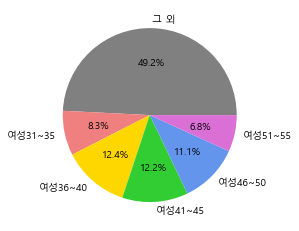

In [14]:
plt.pie(seg,labels=seg.index, colors=['grey','lightcoral','gold','limegreen','cornflowerblue','orchid'],autopct='%0.1f%%')
plt.show()

In [14]:
# 가장 많이 팔린 제품
sales = pd.pivot_table(df,index = '상품명', values='순결제금액', aggfunc='sum' )
sales.sort_values(by='순결제금액',ascending=False).head()

,순결제금액
상품명,
[농협양곡] 김포금쌀 고시히카리 10kg,22330900
[농협양곡] NH신동진쌀 20kg,16502400
[농협양곡] 한수위 파주쌀 (추청) 10kg,10353000
[농협양곡] 탑마루쌀 (신동진) 20kg,9934000
[농협양곡] 한수위 파주쌀 20kg,9712200


In [28]:
# 여성 31세~ 55세가 많이 구매한 제품
filter = ['여성31~35','여성36~40','여성41~45','여성46~50','여성51~55']
filtered = df[df.구분.isin(filter)]
filtered.head()

,상품카테고리(소),상품카테고리(세),상품명,상품ID,결제금액,결제수,결제상품수량,환불금액,환불건수,환불수량,순결제금액,구분
0,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,4154200,84,99,169800,4,4,3984400,여성41~45
1,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,2932200,67,70,123700,3,3,2808500,여성36~40
2,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,2684000,60,64,167700,4,4,2516300,여성31~35
3,쌀,백미,[농협양곡] NH신동진쌀 20kg,4939329513,2659800,37,42,63400,1,1,2596400,여성46~50
4,쌀,백미,[농협양곡] NH신동진쌀 20kg,4939329513,2587400,39,41,125800,2,2,2461600,여성41~45


In [31]:
target = pd.pivot_table(filtered, index='상품명',values='순결제금액',aggfunc='sum')
target.sort_values(by='순결제금액',ascending=False).head()

,순결제금액
상품명,
[농협양곡] 김포금쌀 고시히카리 10kg,12499700
[농협양곡] NH신동진쌀 20kg,9673200
[농협양곡] 탑마루쌀 (신동진) 20kg,6533000
[농협양곡] 탑마루쌀(신동진) 20kg,5140500
[농협양곡] 한수위 파주쌀 (추청) 10kg,4958000
